In [1]:
from cifar10_example import *

In [2]:
teacher = Model(build_teacher_model, "cifar10_teacher", fn_compile)
teacher.load()

In [3]:
xd,yd,xt,yt = load_data()

In [4]:
#(loss, acc) = teacher.model.evaluate(xt,yt,batch_size=128)
(loss, acc) = (0.44668698687553404, 0.9359) # pre calculated


In [5]:
student = Model(build_student_model, "cifar10_student", fn_compile)
callbacks = [keras.callbacks.TensorBoard('logs')]
h2 = student.train(xd,yd,128,10,callbacks,(xt,yt))

student.save()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 99s 2ms/step - loss: 1.3604 - acc: 0.5121 - val_loss: 1.0529 - val_acc: 0.6356
Epoch 2/10
50000/50000 [==============================] - 98s 2ms/step - loss: 0.9216 - acc: 0.6794 - val_loss: 0.8530 - val_acc: 0.7043
Epoch 3/10
50000/50000 [==============================] - 99s 2ms/step - loss: 0.7398 - acc: 0.7437 - val_loss: 0.7647 - val_acc: 0.7373
Epoch 4/10
50000/50000 [==============================] - 99s 2ms/step - loss: 0.6178 - acc: 0.7860 - val_loss: 0.7379 - val_acc: 0.7460
Epoch 5/10
50000/50000 [==============================] - 98s 2ms/step - loss: 0.5141 - acc: 0.8224 - val_loss: 0.7185 - val_acc: 0.7579
Epoch 6/10
50000/50000 [==============================] - 98s 2ms/step - loss: 0.4204 - acc: 0.8547 - val_loss: 0.7310 - val_acc: 0.7631
Epoch 7/10
50000/50000 [==============================] - 98s 2ms/step - loss: 0.3391 - acc: 0.8825 - val_loss: 0.7992 - val_acc

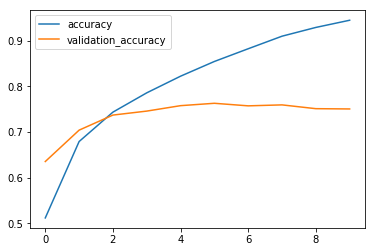

In [6]:
plt.plot(h2.history['acc'], label='accuracy')
plt.plot(h2.history['val_acc'], label='validation_accuracy')
plt.legend()

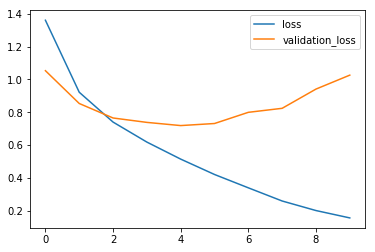

In [7]:
plt.plot(h2.history['loss'], label='loss')
plt.plot(h2.history['val_loss'], label='validation_loss')
plt.legend()

In [8]:
student2 = Model(build_student_model, "cifar10_student2", fn_compile)
yd = np.load("datasets/cifar10preprocessed/train_y.npy")
yt = np.load("datasets/cifar10preprocessed/test_y.npy")

In [9]:
distill = Distill(teacher, student2, 10, 5.0, 0.07)
h3 = distill.teach(xd, yd, 128, 10, callbacks, (xt,yt), pre_processed=True)
student2.save()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 102s 2ms/step - loss: 2.1802 - accuracy: 0.5172 - top_5_accuracy: 0.9256 - categorical_crossentropy: 1.4558 - soft_logloss: 2.0783 - val_loss: 2.0777 - val_accuracy: 0.6411 - val_top_5_accuracy: 0.9707 - val_categorical_crossentropy: 1.1049 - val_soft_logloss: 2.0004
Epoch 2/10
50000/50000 [==============================] - 101s 2ms/step - loss: 2.0407 - accuracy: 0.6827 - top_5_accuracy: 0.9725 - categorical_crossentropy: 1.0142 - soft_logloss: 1.9697 - val_loss: 2.0226 - val_accuracy: 0.6996 - val_top_5_accuracy: 0.9772 - val_categorical_crossentropy: 0.9703 - val_soft_logloss: 1.9547
Epoch 3/10
50000/50000 [==============================] - 100s 2ms/step - loss: 1.9801 - accuracy: 0.7499 - top_5_accuracy: 0.9825 - categorical_crossentropy: 0.8044 - soft_logloss: 1.9238 - val_loss: 1.9892 - val_accuracy: 0.7407 - val_top_5_accuracy: 0.9799 - val_categorical_crossentropy: 0.8470

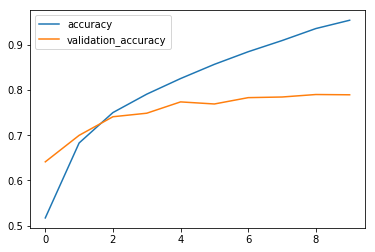

In [10]:
plt.plot(h3.history['accuracy'], label='accuracy')
plt.plot(h3.history['val_accuracy'], label='validation_accuracy')
plt.legend()

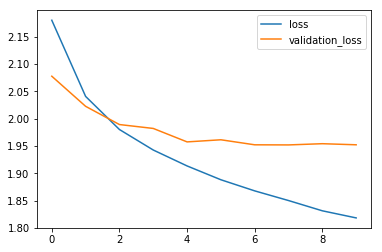

In [11]:
plt.plot(h3.history['loss'], label='loss')
plt.plot(h3.history['val_loss'], label='validation_loss')
plt.legend()

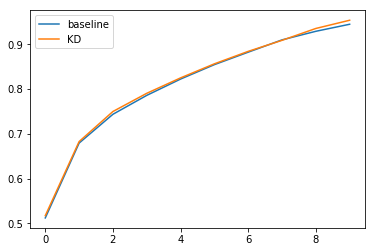

In [13]:
plt.plot(h2.history['acc'], label='baseline')
plt.plot(h3.history['accuracy'], label='KD')
plt.legend()

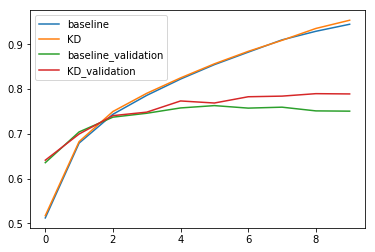

In [14]:
plt.plot(h2.history['acc'], label='baseline')
plt.plot(h3.history['accuracy'], label='KD')
plt.plot(h2.history['val_acc'], label='baseline_validation')
plt.plot(h3.history['val_accuracy'], label='KD_validation')
plt.legend()

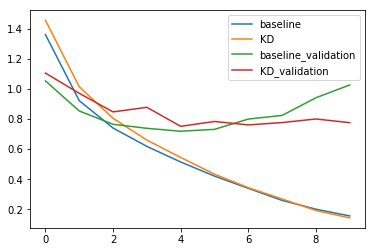

In [15]:
plt.plot(h2.history['loss'], label='baseline')
plt.plot(h3.history['categorical_crossentropy'], label='KD')
plt.plot(h2.history['val_loss'], label='baseline_validation')
plt.plot(h3.history['val_categorical_crossentropy'], label='KD_validation')
plt.legend()